## Questionário - Semana 2 

Leia o texto a seguir para responder o questionário.

### Modelos epidemiológicos SEIR

Modelos matemáticos epidemiológicos modernos funcionam com base em "estados" que são considerados como "compartimentos". Por exemplo, o modelo SEIR considera que uma população, quando ameaçada por uma epidemia, pode ser dividida em quatro compartimentos: 

- S, das pessoas *suscetíveis* à infecção; 
- E, das pessoas *expostas*, que embora hospedeiras, não espalham a doença pelo fato de o vírus ainda estar em incubação; 
- I, das pessoas *infectadas* e
- R, das pessoas *recuperadas*

O número de pessoas $N$ em cada "compartimento" muda com o tempo. Logo, a dinâmica de mudança de estados ocorre por transições. Em cada instante de tempo, um fluxo de transição da forma
S -> E -> I -> R pode ocorrer. Isto é, pessoas suscetíveis podem contrair o vírus, em seguida tornar-se expostas, serem infectadas e, por sua vez, se recuperarem. Portanto, supondo que não haja mortalidade, $N$ deve se conservar ao longo do tempo, mas S, E, I e R podem variar com o tempo. Matematicamente, se $t$ é um instante de tempo, então: 

$$N(t) = S(t) + E(t) + I(t) + R(t)$$

Um modelo SEIR busca prever o número de pessoas em cada estado em um instante de tempo futuro $t_N$ (dia N) a partir de um instante de tempo inicial $t_0$ (dia 0). 

Considere que $a(t)$ seja o número de pessoas que uma pessoa infecta considerado para o dia $t$ – diante de um quadro epidêmico, desejamos que este valor seja o mais próximo de zero possível. Este valor pode se alterar para mais ou para menos mediante o relaxamento ou restrição de medidas de distanciamento social. A função matemática

$$a(t) = a_N + \dfrac{a_0 - a_N}{1 + e^{-k(L-t)}},$$

pode ser usada como um modelo para o cálculo de $a$ levando em consideração medidas drásticas de "lockdown". Na equação: 

- $a_0$ é o valor de $a$ no dia 0
- $a_N$ é o valor de $a$ no dia N
- $L$ é o dia entre o dia 0 e o dia N em que o "lockdown" é decretado.
- $k$ é uma constante de ajuste no intervalo real $(0,1]$ que aumenta a velocidade de declínio de $a$ à medida que se aproxima de $1$. 

A figura a seguir mostra o gráfico de $a(t)$ para $k = 0.2$, $k = 0.4$ e $k = 0.9$ em um intervalo de 100 dias, considerando $a_0 = 7$ e $a_{100} = 0.5$. O lockdown foi determinado no dia 40. Como se vê, quanto maior o valor de $k$, mais brusca é a queda do poder de contágio de uma pessoa.

Base: [[artigo]](https://towardsdatascience.com/infectious-disease-modelling-beyond-the-basic-sir-model-216369c584c4) 

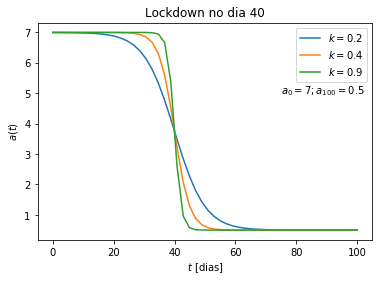

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

f = lambda a0,aN,L,k,t : aN + (a0 - aN)/(1 + np.exp(-k*(L-t)))

t = np.linspace(0,100)
plt.plot(t,f(7,0.5,40,0.2,t));
plt.plot(t,f(7,0.5,40,0.4,t));
plt.plot(t,f(7,0.5,40,0.9,t));
plt.legend(['$k=0.2$','$k=0.4$','$k=0.9$'])
plt.xlabel('$t$ [dias]'); plt.ylabel('$a(t)$'); plt.title('Lockdown no dia 40')
plt.annotate('$a_0 = 7; a_{100} = 0.5$',(75,5));

### Questão 1

Construa um modelo simbólico para $a(t)$ e o atribua à variavel `a`. Qual(is) alternativa(s) seguinte(s) pode(m) ser uma resposta esperada por `type(a)`, independentemente da construção?

a. sympy.core.add.Add 

b. sympy.core.add.Mul

c. sympy.core.add.Exp

d. exp

### Resposta: 

a e b são possíveis.

In [2]:
import sympy as sy

# pode ser Add
t,k,L,a0,aN = sy.symbols('t k L a0 aN',positive=True)
a = aN + (a0 - aN)/(1 + sy.exp(-k*(L-t)))
print(type(a))


# pode ser Mul
am = (aN*(1 + sy.exp(-k*(L-t))) + (a0 - aN) )/(1 + sy.exp(-k*(L-t)))
print(type(am))

<class 'sympy.core.add.Add'>
<class 'sympy.core.mul.Mul'>


In [3]:
a

aN + (a0 - aN)/(1 + exp(-k*(L - t)))

## Questão 2

Considere as seguintes situações: 

1) A cidade A decretou lockdown 30 dias após o dia inicial de observação (dia 0) do contágio epidêmico, assumindo que $a_0 = 5$, $a_{100} = 1$ e modelou a curva $a(t)$ com $k = 0.2$.

2) A cidade B decretou lockdown 40 dias após o dia inicial de observação (dia 0) do contágio epidêmico, assumindo que $a_0 = 5$, $a_{100} = 1$ e modelou a curva $a(t)$ com $k = 0.1$.

Sendo $P_1$ e $P_2$ os valores de $a(t)$ calculados pelos modelos das cidades A e B, respectivamente, para o 21o. dia após o início da análise, o que podemos afirmar?

a. P1 > P2

b. P1 < P2

c. P1 = P2 > 0

d. P1 = P2 = 0


### Resposta

Resposta b.

In [5]:
p1 = a.subs([ (k,0.2),(L,30),(t,21),(a0,5),(aN,1) ])
p2 = a.subs([ (k,0.1),(L,40),(t,21),(a0,5),(aN,1) ])


-0.0469703621499598

## Questão 3

Considere que a população de uma cidade acometida pela epidemia seja de 38.416 habitantes. No 16o. dia, a análise mostrou que o número de pessoas suscetíveis ao contágio era o triplo das que estavam já em exposição ao vírus. Estas, por sua vez, estavam em mesmo número que as infectadas no dia. As recuperadas contabilizavam exatamente 16. 

O código abaixo, iniciado por um analista, buscou determinar o percentual de pessoas expostas em relação à população total da cidade no 16o. dia. 

```python
from sympy.abc import N,S,E,I,R
from sympy import Eq, solveset
tot = Eq( S + E + I + R - N,0)
...
```

Ao completar este código, ou desenvolver o seu próprio, você pode concluir que este percentual é de:

a. maior do que 50%.
b. entre 30% e 45%.
c. aproximadamente 20%.
d. menor do que 10%.


### Resposta 

Alternativa c)

In [42]:
# Q3 
# Dia 16

from sympy.abc import N,S,E,I,R
from sympy import Eq, solveset

tot = Eq( S + E + I + R - N,0)
tot = tot.subs(N,38416)
tot = tot.subs(S,3*E)
tot = tot.subs(I,E)
tot = tot.subs(R,16)
print(sy.solveset(tot,E))
7680/38416

FiniteSet(7680)


0.19991670137442732

## Questão 4

Algumas funções anônimas foram programadas na tentativa de representar o termo $e^{-k(L-t)}$ que aparece no denominador da fração do modelo de $a(t)$. Assinale a alternativa cuja definição expressa corretamente o termo, tendo em vista que `exp` é a exponencial simbólica: 

```
a. fexp = lambda k,L,t: exp(-k(L-t))
b. fexp = lambda k,L-t: exp(-k(L-t))
c. fexp = lambda k,Lt: exp(-k*(Lt))
d. fexp = lambda k,L,t: exp(-k*(L-t))
```

### Resposta 

Alternativa d)

In [46]:
from sympy import exp

#fexp = lambda k,L,t: exp(-k(L-t))
#fexp = lambda k,L-t: exp(-k(L-t))
fexp = lambda k,L,t: exp(-k*(L-t))
#fexp = lambda k,Lt: exp(-k*(Lt))
fexp(k,L,t)

exp(-k*(L - t))

## Questão 5

Considere o seguinte excerto de código:

```python
from sympy.abc import S,E,I,R
SEIR = S*E*I*R
```

Podemos concluir que 

$$\text{sen}( SEIR + SEIR^{-1} + 1/SEIR^{-1}) = \text{sen}(x + y),$$

onde

a. $x = 2SEIR; \ \ y = 1/SEIR$

b. $x = 3SEIR; \ \ y = 0$

c. $x = SEIR; \ \ y = 2/SEIR$

d. $x = SEIR; \ \ y = 1/SEIR$



### Resposta

Alternativa a).

In [52]:
from sympy.abc import S,E,I,R
SEIR = S*E*I*R
sy.simplify(sy.expand_trig(sy.sin( SEIR + 1/SEIR + 1/(1/SEIR))))

sin(2*E*I*R*S + 1/(E*I*R*S))